In [1]:
import multiprocessing as mp
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import mabs

sns.set_theme()

n = 1000
mus = np.linspace(0, 1, 100)
ms = [25, 50, 75, 100]

In [2]:
def experiment(mu, m, n):
    exp_regret = np.empty(100)
    for i in range(100):
        arms = [
            mabs.arms.NormalArm(0, 1),
            mabs.arms.NormalArm(mu, 1),
        ]
        env = mabs.envs.simple.ETC(m, n)
        env.arms = arms

        for _ in range(n):
            env.act()
        exp_regret[i] = env.regret

    return exp_regret, mu, m, n

In [3]:
regrets = []
args = []

for mu in mus:
    for m in ms:
        args.append([mu, m, 1000])
with mp.Pool(32) as p:
    result = p.starmap(experiment, args)

with open("result.pkl", "wb") as f:
    pickle.dump(result, f)

In [4]:
with open("result.pkl", "rb") as f:
    result_raw = pickle.load(f)

In [6]:
mean_regret = [(regret.mean(), mu, m, n) for regret, mu, m, n in result_raw]
mean_regret_df = pd.DataFrame(mean_regret, columns=["expected_regret", "mu", "m", "n"])
sns.lineplot(data=mean_regret_df, x="mu", y="expected_regret", hue="m")

<AxesSubplot: xlabel='mu', ylabel='var_regret'>

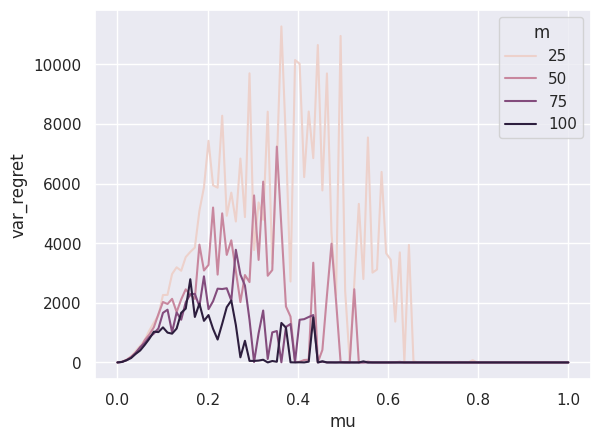

In [9]:
var_regret = [(regret.var(), mu, m, n) for regret, mu, m, n in result_raw]
var_regret_df = pd.DataFrame(var_regret, columns=["var_regret", "mu", "m", "n"])
sns.lineplot(data=var_regret_df, x="mu", y="var_regret", hue="m")
plt.legend(loc="lower right")
plt.title("Mean Regret of Different Nus")
plt.tight_layout()
plt.savefig("linucb_regret_mean.pdf")